202331241_Sabrina Herman

In [30]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

numpy: Untuk membuat array dan perhitungan numerik.
random: Digunakan untuk implementasi eksplorasi dalam kebijakan epsilon-greedy.
matplotlib.pyplot dan seaborn: Untuk visualisasi data, seperti heatmap dan grafik jalur optimal.

In [36]:
alpha = 0.1  
gamma = 0.9  
epsilon = 0.2 
episodes = 1000  

alpha: Menentukan seberapa cepat Q-table diperbarui dari pengalaman baru.
gamma: Discount factor, memberi bobot lebih besar pada reward di masa depan.
epsilon: Mengontrol eksplorasi dan eksploitasi (epsilon-greedy).
episodes: Jumlah episode pelatihan.

In [7]:
actions = ['normal', 'fast', 'slow']
action_dict = {'normal': 0, 'fast': 1, 'slow': 2}

In [9]:
Q = np.zeros((6, 6, len(actions)))

actions: Tiga jenis aksi (produksi normal, cepat, lambat).
action_dict: Mapping aksi ke indeks.
Q: Q-table diinisialisasi dengan nol untuk semua kombinasi state-action.

In [38]:
def choose_action(state):
    if random.uniform(0, 1) < epsilon: 
        return random.choice(range(len(actions)))
    else:  
        return np.argmax(Q[state[0], state[1]])

Memilih aksi berdasarkan kebijakan epsilon-greedy:
Eksplorasi: Memilih aksi secara acak.
Eksploitasi: Memilih aksi dengan nilai Q tertinggi.

In [40]:
def get_reward(state, action):
    
    bahan_baku = state[0]
    waktu_kerja = state[1]

    if action == 'normal':
        if bahan_baku >= 1 and waktu_kerja >= 1:
            return 5  
        else:
            return -10  
    elif action == 'fast':
        if bahan_baku >= 2 and waktu_kerja >= 2:
            return 15  
        else:
            return -15  
    elif action == 'slow':
        if bahan_baku >= 1 and waktu_kerja >= 1:
            return 3 
        else:
            return -5  
    return 0

Reward diberikan berdasarkan kombinasi bahan baku, waktu kerja, dan aksi:
normal: Reward +5, penalti -10 jika sumber daya kurang.
fast: Reward +15, penalti -15 jika tidak cukup sumber daya.
slow: Reward +3, penalti -5 jika sumber daya kurang.

In [42]:
def train_q_learning():
    for episode in range(episodes):
        
        state = (5, 5)
        while state[0] > 0 and state[1] > 0:  
            action_idx = choose_action(state)
            action = actions[action_idx]

           
            reward = get_reward(state, action)

            
            if action == 'normal':
                next_state = (state[0] - 1, state[1] - 1)
            elif action == 'fast':
                next_state = (state[0] - 2, state[1] - 2)
            elif action == 'slow':
                next_state = (state[0] - 1, state[1] - 1)

       
            next_state = (max(0, next_state[0]), max(0, next_state[1]))

            
            next_action = np.argmax(Q[next_state[0], next_state[1]])  
            Q[state[0], state[1], action_idx] = Q[state[0], state[1], action_idx] + alpha * (reward + gamma * Q[next_state[0], next_state[1], next_action] - Q[state[0], state[1], action_idx])

            state = next_state

State awal dimulai dari (5, 5).
Aksi dipilih menggunakan fungsi choose_action().
Reward dihitung, dan Q-value diperbarui menggunakan rumus Q-learning.
Proses diulang selama bahan baku dan waktu kerja masih tersedia.

In [44]:
def evaluate_policy():
    state = (5, 5)
    path = [state]
    total_reward = 0
    while state[0] > 0 and state[1] > 0:
        action_idx = np.argmax(Q[state[0], state[1]])  
        action = actions[action_idx]
        
        if action == 'normal':
            next_state = (state[0] - 1, state[1] - 1)
        elif action == 'fast':
            next_state = (state[0] - 2, state[1] - 2)
        elif action == 'slow':
            next_state = (state[0] - 1, state[1] - 1)
        
        next_state = (max(0, next_state[0]), max(0, next_state[1]))
        reward = get_reward(state, action)
        total_reward += reward
        path.append(next_state)
        state = next_state

    return path, total_reward

Menentukan jalur optimal berdasarkan nilai Q tertinggi pada setiap state.
Menghitung total reward sepanjang jalur optimal.

In [19]:
train_q_learning()

In [21]:
optimal_path, total_reward = evaluate_policy()
print("Optimal path found by Q-learning:", optimal_path)
print("Total reward of the optimal path:", total_reward)

Optimal path found by Q-learning: [(5, 5), (3, 3), (1, 1), (0, 0)]
Total reward of the optimal path: 35


Model dilatih dengan train_q_learning().
Kebijakan optimal dievaluasi menggunakan evaluate_policy().
Jalur optimal dan total reward dicetak.

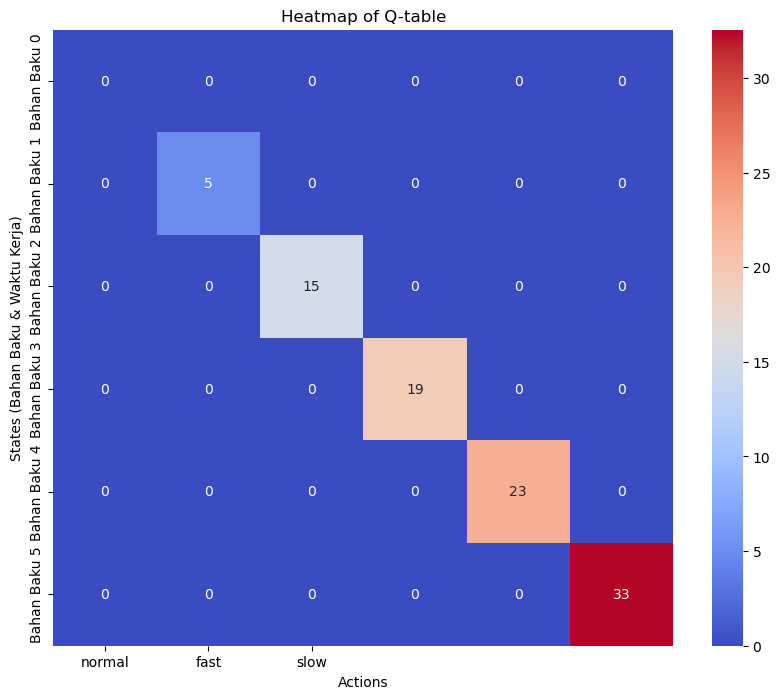

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.max(Q, axis=2), annot=True, cmap='coolwarm', xticklabels=actions, yticklabels=[f'Bahan Baku {i}' for i in range(6)])
plt.title('Heatmap of Q-table')
plt.xlabel('Actions')
plt.ylabel('States (Bahan Baku & Waktu Kerja)')
plt.show()

np.max(Q, axis=2): Menampilkan nilai Q maksimum di setiap state.
Heatmap menggambarkan nilai Q tertinggi untuk setiap kombinasi bahan baku dan waktu kerja.

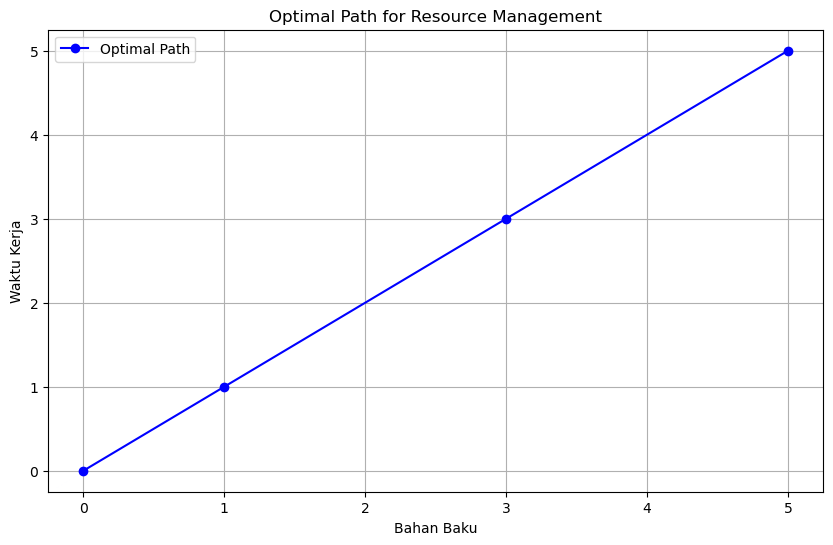

In [34]:
path_states = np.array(optimal_path)
plt.figure(figsize=(10, 6))
plt.plot(path_states[:, 0], path_states[:, 1], marker='o', color='b', label='Optimal Path')
plt.title('Optimal Path for Resource Management')
plt.xlabel('Bahan Baku')
plt.ylabel('Waktu Kerja')
plt.grid(True)
plt.legend()
plt.show()

Visualisasi jalur optimal dengan bahan baku di sumbu X dan waktu kerja di sumbu Y.
Menunjukkan bagaimana sumber daya digunakan sepanjang jalur.